# Name of the Student : Aagam Manish Shah

# USC ID Number: 8791018480

# 3. Time Series Classification

# An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network

In [69]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob
from sklearn import preprocessing
import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

import statsmodels.api as sm

# (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file containis 6 time series collected from activities of the same person, which are called avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, and var_rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

# Raw Data

In [6]:
# Raw Features for bending1

os.chdir("../Data/bending1")
extension = 'csv'
all_bending1_data = [i for i in glob.glob('*.{}'.format(extension))]
bending1_list = []
for file in all_bending1_data:
    bending1_df = pd.read_csv(file, skiprows = 4)
    bending1_list.append(bending1_df)
bending1_dataframe = pd.concat(bending1_list, axis=0, ignore_index=True)
bending1_dataframe = bending1_dataframe.drop(columns = bending1_dataframe.columns[0])
bending1_dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,39.25,0.43,22.75,0.43,33.75,1.30
1,39.25,0.43,23.00,0.00,33.00,0.00
2,39.25,0.43,23.25,0.43,33.00,0.00
3,39.50,0.50,23.00,0.71,33.00,0.00
4,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...
3355,44.25,0.83,16.25,1.30,24.00,0.00
3356,44.00,0.71,11.00,1.00,24.00,0.00
3357,44.25,0.43,10.25,1.30,22.75,0.83
3358,43.75,0.43,7.33,2.87,21.50,0.50


In [8]:
# Raw Features for bending2

os.chdir("../Data/bending2")
extension = 'csv'
all_bending2_data = [i for i in glob.glob('*.{}'.format(extension))]
bending2_list = []
for file in all_bending2_data:
    bending2_df = pd.read_csv(file, skiprows = 4)
    bending2_list.append(bending2_df)
bending2_dataframe = pd.concat(bending2_list, axis=0, ignore_index=True)
bending2_dataframe = bending2_dataframe.drop(columns = bending2_dataframe.columns[0])
bending2_dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,23.75,0.43,24.00,0.00,24.67,0.47
1,22.67,0.94,24.00,0.00,24.67,0.94
2,21.33,0.47,24.00,0.00,24.75,0.83
3,21.00,0.00,24.00,0.00,25.25,1.09
4,23.00,0.71,23.75,0.43,24.75,0.83
...,...,...,...,...,...,...
2875,27.00,0.00,14.00,0.00,6.50,0.50
2876,27.00,0.00,15.00,0.00,4.00,1.00
2877,27.00,0.00,14.25,0.83,4.00,2.00
2878,27.00,0.00,13.33,1.25,1.50,0.50


In [9]:
# Raw Features for cycling

os.chdir("../Data/cycling")
extension = 'csv'
all_cycling_data = [i for i in glob.glob('*.{}'.format(extension))]
cycling_list = []
for file in all_cycling_data:
    cycling_df = pd.read_csv(file, skiprows = 4)
    cycling_list.append(cycling_df)
cycling_dataframe = pd.concat(cycling_list, axis=0, ignore_index=True)
cycling_dataframe = cycling_dataframe.drop(columns = cycling_dataframe.columns[0])
cycling_dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,32.00,4.85,17.50,3.35,22.50,3.20
1,40.50,1.12,14.00,2.24,21.75,1.30
2,40.50,2.60,11.33,4.50,18.25,5.31
3,34.50,1.50,20.67,2.87,19.00,2.83
4,34.50,1.50,21.25,3.27,18.25,4.38
...,...,...,...,...,...,...
7195,41.75,1.79,11.00,6.00,16.67,2.49
7196,36.33,0.47,16.00,3.16,20.33,1.70
7197,31.50,1.50,21.00,0.00,12.25,7.12
7198,34.25,6.38,12.67,2.49,15.25,4.21


In [10]:
# Raw Features for lying

os.chdir("../Data/lying")
extension = 'csv'
all_lying_data = [i for i in glob.glob('*.{}'.format(extension))]
lying_list = []
for file in all_lying_data:
    lying_df = pd.read_csv(file, skiprows = 4)
    lying_list.append(lying_df)
lying_dataframe = pd.concat(lying_list, axis=0, ignore_index=True)
lying_dataframe = lying_dataframe.drop(columns = lying_dataframe.columns[0])
lying_dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,29.00,0.00,9.00,0.71,8.50,0.50
1,29.00,0.00,8.00,0.71,8.50,0.50
2,29.00,0.00,8.00,0.71,8.00,1.00
3,28.50,0.50,8.25,0.43,8.75,0.43
4,29.00,0.00,8.75,1.09,9.00,0.00
...,...,...,...,...,...,...
7195,41.50,0.50,10.67,0.47,14.00,0.82
7196,41.50,0.50,10.80,0.40,14.40,0.80
7197,41.75,0.43,10.00,0.00,13.67,0.94
7198,42.00,0.00,9.40,0.49,14.00,1.10


In [11]:
# Raw Features for sitting

os.chdir("../Data/sitting")
extension = 'csv'
all_sitting_data = [i for i in glob.glob('*.{}'.format(extension))]
sitting_list = []
for file in all_sitting_data:
    sitting_df = pd.read_csv(file, skiprows = 4)
    sitting_list.append(sitting_df)
sitting_dataframe = pd.concat(sitting_list, axis=0, ignore_index=True)
sitting_dataframe = sitting_dataframe.drop(columns = sitting_dataframe.columns[0])
sitting_dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,42.0,0.0,19.20,0.98,15.50,2.06
1,42.0,0.0,19.33,0.94,11.00,0.82
2,42.0,0.0,17.50,0.50,12.50,0.50
3,42.0,0.0,17.00,1.41,13.33,0.94
4,42.0,0.0,17.50,0.87,12.00,0.82
...,...,...,...,...,...,...
7195,42.0,0.0,20.50,0.87,18.50,0.50
7196,42.0,0.0,21.25,0.43,17.50,0.50
7197,42.0,0.0,21.00,0.00,16.00,0.82
7198,42.0,0.0,21.00,0.00,18.25,0.43


In [12]:
# Raw Features for standing

os.chdir("../Data/standing")
extension = 'csv'
all_standing_data = [i for i in glob.glob('*.{}'.format(extension))]
standing_list = []
for file in all_standing_data:
    standing_df = pd.read_csv(file, skiprows = 4)
    standing_list.append(standing_df)
standing_dataframe = pd.concat(standing_list, axis=0, ignore_index=True)
standing_dataframe = standing_dataframe.drop(columns = standing_dataframe.columns[0])
standing_dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,46.50,0.50,11.50,0.50,20.33,0.94
1,46.50,0.50,12.00,0.00,20.25,0.43
2,46.50,0.50,12.00,0.00,20.50,0.50
3,46.50,0.50,12.75,0.43,19.50,0.50
4,46.50,0.50,13.25,0.43,18.75,0.43
...,...,...,...,...,...,...
7195,44.50,0.50,18.75,0.83,5.25,1.79
7196,44.50,0.50,19.33,0.47,6.00,0.82
7197,44.50,0.50,19.25,0.83,7.25,1.30
7198,44.50,0.50,19.00,0.71,8.00,0.71


In [13]:
# Raw Features for walking

os.chdir("../Data/walking")
extension = 'csv'
all_walking_data = [i for i in glob.glob('*.{}'.format(extension))]
walking_list = []
for file in all_walking_data:
    walking_df = pd.read_csv(file, skiprows = 4)
    walking_list.append(walking_df)
walking_dataframe = pd.concat(walking_list, axis=0, ignore_index=True)
walking_dataframe = walking_dataframe.drop(columns = walking_dataframe.columns[0])
walking_dataframe

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,35.00,3.67,16.50,3.77,14.00,1.63
1,28.50,3.35,17.50,3.77,12.25,3.90
2,35.50,2.87,15.75,2.86,17.75,5.07
3,29.75,12.19,16.25,2.17,20.75,2.59
4,27.00,2.12,16.75,0.83,24.75,1.64
...,...,...,...,...,...,...
7195,31.50,1.66,12.50,3.20,14.25,4.44
7196,27.33,1.25,11.33,0.94,20.00,4.00
7197,37.80,7.68,14.20,2.48,17.25,0.83
7198,33.75,1.30,15.75,5.21,16.50,2.69


# (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data.

# Final Train Dataframe

In [72]:
# Training Data

os.chdir("../Data/training_data")
extension = 'csv'
all_training_data = [i for i in glob.glob('*.{}'.format(extension))]
train_list = []
for filename in all_training_data:
    train_df = pd.read_csv(filename, skiprows = 4)
    train_list.append(train_df)
training_dataframe = pd.concat(train_list, axis=0, ignore_index=True)
# training_dataframe = training_dataframe.drop(columns = training_dataframe.columns[0])
training_dataframe

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.71,21.25,0.43,30.00,0.00
1,250,41.50,0.50,20.25,1.48,31.25,1.09
2,500,41.50,0.50,14.25,1.92,33.00,0.00
3,750,40.75,0.83,15.75,0.43,33.00,0.00
4,1000,40.00,0.71,20.00,2.74,32.75,0.43
...,...,...,...,...,...,...,...
33115,118750,31.50,1.66,12.50,3.20,14.25,4.44
33116,119000,27.33,1.25,11.33,0.94,20.00,4.00
33117,119250,37.80,7.68,14.20,2.48,17.25,0.83
33118,119500,33.75,1.30,15.75,5.21,16.50,2.69


# Final Test Dataframe

In [5]:
# Testing Data

os.chdir("../Data/testing_data")
extension = 'csv'
all_testing_data = [i for i in glob.glob('*.{}'.format(extension))]
test_list = []
for file in all_testing_data:
    test_df = pd.read_csv(file, skiprows = 4)
    test_list.append(test_df)
test_dataframe = pd.concat(test_list, axis=0, ignore_index=True)
# test_dataframe = test_dataframe.drop(columns = test_dataframe.columns[0])
test_dataframe

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.30
1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,500,39.25,0.43,23.25,0.43,33.00,0.00
3,750,39.50,0.50,23.00,0.71,33.00,0.00
4,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...
9115,118750,36.00,2.45,17.00,5.10,20.50,0.87
9116,119000,34.33,1.89,15.00,2.45,17.00,2.12
9117,119250,33.00,7.35,14.60,3.14,13.00,5.70
9118,119500,31.67,1.25,11.00,6.16,19.25,2.17


# (c) Feature Extraction Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

## i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

There are nine features helping people to evaluate data, such as minimum, maximum, mean, median, standard deviation, first quartile, third quartile, skewness and kurtosis.

## ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly. 

In [17]:
# Time Domain Features

os.chdir("../Data/Final_files")
extension = 'csv'
all_data = [i for i in glob.glob('*.{}'.format(extension))]
final_feature_list = []
for filename in all_data:
    final_feature_df = pd.read_csv(filename, skiprows = 4)
    # pd.numeric fill na
    final_feature_df = final_feature_df.drop(columns = final_feature_df.columns[0])
    featurelist = []
    for column in final_feature_df:
        featurelist.append(final_feature_df.min()[column])
        featurelist.append(final_feature_df.max()[column])
        featurelist.append(final_feature_df.mean()[column])
        featurelist.append(final_feature_df.median()[column])
        featurelist.append(final_feature_df.std()[column])
        featurelist.append(final_feature_df.quantile(q = 0.25)[column])
        featurelist.append(final_feature_df.quantile(q = 0.75)[column])
    final_feature_list.append(featurelist)
FinalfeatureDataFrame = pd.DataFrame(final_feature_list)
FinalfeatureDataFrame.columns = ["min_1","max_1","mean_1","median_1","std_1","first_quartile_1","third_quartile_1",
                                "min_2","max_2","mean_2","median_2","std_2","first_quartile_2","third_quartile_2",
                                "min_3","max_3","mean_3","median_3","std_3","first_quartile_3","third_quartile_3",
                                "min_4","max_4","mean_4","median_4","std_4","first_quartile_4","third_quartile_4",
                                "min_5","max_5","mean_5","median_5","std_5","first_quartile_5","third_quartile_5",
                                "min_6","max_6","mean_6","median_6","std_6","first_quartile_6","third_quartile_6"]

In [18]:
FinalfeatureDataFrame

,min_1,max_1,mean_1,median_1,std_1,first_quartile_1,third_quartile_1,min_2,max_2,mean_2,...,std_5,first_quartile_5,third_quartile_5,min_6,max_6,mean_6,median_6,std_6,first_quartile_6,third_quartile_6
0,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
3,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
84,21.50,51.00,34.935813,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200
86,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,2.905688,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600


## iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python's bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [19]:
print("The Standard Deviation of each Time Domain Feature in the Feature Data Frame is as follows:")
FinalfeatureDataFrame.std()

The Standard Deviation of each Time Domain Feature in the Feature Data Frame is as follows:


min_1               9.569975
max_1               4.394362
mean_1              5.335703
median_1            5.440054
std_1               1.772155
first_quartile_1    6.153590
third_quartile_1    5.138925
min_2               0.000000
max_2               5.062729
mean_2              1.574170
median_2            1.412244
std_2               0.884104
first_quartile_2    0.946386
third_quartile_2    2.125266
min_3               2.956462
max_3               4.875137
mean_3              4.008386
median_3            4.036396
std_3               0.946695
first_quartile_3    4.220658
third_quartile_3    4.171628
min_4               0.000000
max_4               2.183625
mean_4              1.166071
median_4            1.145586
std_4               0.458200
first_quartile_4    0.843620
third_quartile_4    1.552504
min_5               6.124001
max_5               5.741238
mean_5              5.675593
median_5            5.813782
std_5               1.024873
first_quartile_5    6.096465
third_quartile

In [65]:
confidence_interval = {}
for column in FinalfeatureDataFrame.columns:
    CIRange = []
    for i in range(0, 999):
        random_sample = FinalfeatureDataFrame[column].sample(n=10, replace=True)
        statistic = random_sample.std()
        CIRange.append(statistic)
    CIRange.sort()
    lowerValue = np.percentile(CIRange, 0.05)
    upperValue = np.percentile(CIRange, 0.95)
    confidence_interval[column] = [lowerValue, upperValue]
pp = pprint.PrettyPrinter(depth=2)
pp.pprint(confidence_interval)

{'first_quartile_1': [2.434329676448722, 3.366996234007644],
 'first_quartile_2': [0.09047065567231055, 0.22674026269040842],
 'first_quartile_3': [1.2138443327889892, 1.4584608629605715],
 'first_quartile_4': [0.1359779393872403, 0.21460790434771387],
 'first_quartile_5': [1.1654457356585062, 1.6613819157244043],
 'first_quartile_6': [0.023243468400017994, 0.14678985913213802],
 'max_1': [0.6713218284840732, 1.176844130912679],
 'max_2': [1.171334246157889, 2.379271564834458],
 'max_3': [0.8962188968973923, 1.6110010648818567],
 'max_4': [0.823354188157454, 1.2332930044111143],
 'max_5': [0.6685868792841076, 1.6522876841551937],
 'max_6': [0.9537219540312105, 1.3251345500631702],
 'mean_1': [2.4550811274869675, 2.8738639483071298],
 'mean_2': [0.05956850836087836, 0.14539929287493275],
 'mean_3': [0.721207530613519, 1.1640470285073383],
 'mean_4': [0.12877498730052891, 0.21041846821441362],
 'mean_5': [1.0237127931779069, 1.375486392158558],
 'mean_6': [0.1400412773178925, 0.222268953

## iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

 I choose min, max and mean

# (d) Binary Classification Using Logistic Regression

## i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [20]:
# Binary Classification using Logistic Regression

labels = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
         ,1,1,1,1,1,1,1,1,1,1,1,1]

Train_feature_Dataframe = FinalfeatureDataFrame.drop(FinalfeatureDataFrame.index[[0,1,7,8,13,20,21,28,35,36,43,50,51,58,65,66,
                                                                                  73,80,81]])
Train_feature_Dataframe['Labels'] = labels
Train_feature_Dataframe

,min_1,max_1,mean_1,median_1,std_1,first_quartile_1,third_quartile_1,min_2,max_2,mean_2,...,first_quartile_5,third_quartile_5,min_6,max_6,mean_6,median_6,std_6,first_quartile_6,third_quartile_6,Labels
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400,0
3,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000,0
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000,0
5,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.00,0.0,5.26,0.679646,0.500,0.622534,0.43,0.8700,0
6,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.75,0.0,2.96,0.555313,0.490,0.487826,0.00,0.8300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050,1
84,21.50,51.00,34.935813,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000,1
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200,1
86,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600,1


In [21]:
Specific_train_feature_Dataframe = Train_feature_Dataframe[['min_1','max_1','mean_1','min_2','max_2','mean_2','min_6','max_6',
                                                            'mean_6','Labels']]
Specific_train_feature_Dataframe

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_6,max_6,mean_6,Labels
2,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,0
3,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,0
4,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,0
5,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,0
6,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555313,0
...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,0.0,12.68,4.223792,0.0,9.39,3.288271,1
84,21.50,51.00,34.935813,0.0,12.21,4.115750,0.0,10.21,3.280021,1
85,18.33,47.67,34.333042,0.0,12.48,4.396958,0.0,8.01,3.261583,1
86,18.33,45.75,34.599875,0.0,15.37,4.398833,0.0,8.86,3.289542,1


In [28]:
Specific_train_feature_Dataframe = Specific_train_feature_Dataframe.apply(pd.to_numeric)

In [ ]:
a = sns.pairplot(Specific_train_feature_Dataframe)

## ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [30]:
# Breaking Time series into two parts

Index_list = []
for i in range (1,241):
    count = i
    Index_list.append(count)

os.chdir("../Data/training_data/")
extension = 'csv'
full_training_data = [i for i in glob.glob('*.{}'.format(extension))]
train_extended_list = []
for filename in full_training_data:
    df_1 = pd.read_csv(filename, skiprows = 4, header = None)
    df_1 = df_1.drop(columns = df_1.columns[0])
    df_2 = df_1[241:]
    df_1 = df_1[1:241]
    df_2 = df_2.set_index([pd.Index(Index_list)])
    final_df = pd.concat([df_1, df_2], axis = 1)
    train_extended_list.append(final_df)
training_split_dataframe = pd.concat(train_extended_list, axis=0, ignore_index=True)
training_split_dataframe.columns = ['avg_rss12(1)','var_rss12(1)','avg_rss13(1)','var_rss13(1)','avg_rss23(1)','var_rss23(1)',
                                    'avg_rss12(2)','var_rss12(2)','avg_rss13(2)','var_rss13(2)','avg_rss23(2)','var_rss23(2)']
training_split_dataframe

,avg_rss12(1),var_rss12(1),avg_rss13(1),var_rss13(1),avg_rss23(1),var_rss23(1),avg_rss12(2),var_rss12(2),avg_rss13(2),var_rss13(2),avg_rss23(2),var_rss23(2)
0,42.00,0.71,21.25,0.43,30.00,0.00,43.33,0.94,18.00,0.00,35.67,0.47
1,41.50,0.50,20.25,1.48,31.25,1.09,44.20,0.75,19.75,0.83,35.40,1.20
2,41.50,0.50,14.25,1.92,33.00,0.00,45.00,0.00,21.75,0.83,35.00,1.41
3,40.75,0.83,15.75,0.43,33.00,0.00,45.00,0.00,23.33,0.47,36.00,0.00
4,40.00,0.71,20.00,2.74,32.75,0.43,45.00,0.00,24.00,0.00,36.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
16555,37.25,4.26,16.25,3.63,14.50,2.60,31.50,1.66,12.50,3.20,14.25,4.44
16556,24.25,3.27,12.25,1.79,13.50,5.59,27.33,1.25,11.33,0.94,20.00,4.00
16557,27.25,7.98,17.75,4.44,13.00,6.52,37.80,7.68,14.20,2.48,17.25,0.83
16558,41.00,4.06,16.00,3.24,15.50,5.41,33.75,1.30,15.75,5.21,16.50,2.69


In [33]:
training_split_dataframe = training_split_dataframe.apply(pd.to_numeric)

In [34]:
# Split Time Domain Features

Final_split_feature_list = []
for i in range(69):
    SectionFrame = training_split_dataframe[i*240:(i+1)*240]
    featurelist = []
    for j in range(len(SectionFrame.columns)):
        featurelist.append(SectionFrame[SectionFrame.columns[j]].min())
        featurelist.append(SectionFrame[SectionFrame.columns[j]].max())
        featurelist.append(SectionFrame[SectionFrame.columns[j]].mean())
        featurelist.append(SectionFrame[SectionFrame.columns[j]].median())
        featurelist.append(SectionFrame[SectionFrame.columns[j]].std())
        featurelist.append(SectionFrame[SectionFrame.columns[j]].quantile(q = 0.25))
        featurelist.append(SectionFrame[SectionFrame.columns[j]].quantile(q = 0.75))
    Final_split_feature_list.append(featurelist)
FinalsplitfeatureDataFrame = pd.DataFrame(Final_split_feature_list)
FinalsplitfeatureDataFrame.columns = ["min_1","max_1","mean_1","median_1","std_1","first_quartile_1","third_quartile_1",
                                      "min_2","max_2","mean_2","median_2","std_2","first_quartile_2","third_quartile_2",
                                      "min_3","max_3","mean_3","median_3","std_3","first_quartile_3","third_quartile_3",
                                      "min_4","max_4","mean_4","median_4","std_4","first_quartile_4","third_quartile_4",
                                      "min_5","max_5","mean_5","median_5","std_5","first_quartile_5","third_quartile_5",
                                      "min_6","max_6","mean_6","median_6","std_6","first_quartile_6","third_quartile_6",
                                      "min_7","max_7","mean_7","median_7","std_7","first_quartile_7","third_quartile_7",
                                      "min_8","max_8","mean_8","median_8","std_8","first_quartile_8","third_quartile_8",
                                      "min_9","max_9","mean_9","median_9","std_9","first_quartile_9","third_quartile_9",
                                      "min_10","max_10","mean_10","median_10","std_10","first_quartile_10","third_quartile_10",
                                      "min_11","max_11","mean_11","median_11","std_11","first_quartile_11","third_quartile_11",
                                      "min_12","max_12","mean_12","median_12","std_12","first_quartile_12","third_quartile_12"]
FinalsplitfeatureDataFrame 

,min_1,max_1,mean_1,median_1,std_1,first_quartile_1,third_quartile_1,min_2,max_2,mean_2,...,std_11,first_quartile_11,third_quartile_11,min_12,max_12,mean_12,median_12,std_12,first_quartile_12,third_quartile_12
0,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,0.381042,...,2.298693,33.0000,36.2500,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100
1,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,0.673292,...,3.760118,28.7500,33.7500,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700
2,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,0.623083,...,2.062647,28.3100,30.5625,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000
3,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,0.0,1.30,0.250042,...,1.881721,22.5000,23.7500,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100
4,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,0.0,1.30,0.378667,...,1.929494,21.0000,23.5000,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,22.33,46.00,34.966250,35.500,4.733014,32.0000,38.7500,0.0,12.68,4.207958,...,3.325780,14.0000,18.5000,0.00,9.39,3.430208,3.350,1.647979,2.1700,4.4400
65,21.50,45.67,34.737042,35.500,4.276717,32.0000,37.7500,0.0,12.21,4.217333,...,3.148561,14.5000,18.2500,0.00,10.21,3.225917,3.085,1.665326,2.0500,4.3500
66,18.33,45.00,33.886458,34.375,5.143776,30.4575,37.5000,0.0,12.44,4.332208,...,3.389030,13.6275,18.2500,0.00,8.01,3.274750,2.955,1.670593,2.0500,4.4375
67,18.33,44.00,34.836458,35.750,4.869092,32.0000,38.6900,0.0,12.38,4.257750,...,2.882455,13.9375,18.2500,0.47,8.84,3.409458,3.110,1.707089,2.1700,4.3450


In [35]:
labels = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
         ,1,1,1,1,1,1,1,1,1,1,1,1]

Train_split_feature_Dataframe = FinalsplitfeatureDataFrame 
Train_split_feature_Dataframe['Labels'] = labels
Train_split_feature_Dataframe

,min_1,max_1,mean_1,median_1,std_1,first_quartile_1,third_quartile_1,min_2,max_2,mean_2,...,first_quartile_11,third_quartile_11,min_12,max_12,mean_12,median_12,std_12,first_quartile_12,third_quartile_12,Labels
0,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,0.381042,...,33.0000,36.2500,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100,0
1,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,0.673292,...,28.7500,33.7500,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700,0
2,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,0.623083,...,28.3100,30.5625,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000,0
3,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,0.0,1.30,0.250042,...,22.5000,23.7500,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100,0
4,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,0.0,1.30,0.378667,...,21.0000,23.5000,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,22.33,46.00,34.966250,35.500,4.733014,32.0000,38.7500,0.0,12.68,4.207958,...,14.0000,18.5000,0.00,9.39,3.430208,3.350,1.647979,2.1700,4.4400,1
65,21.50,45.67,34.737042,35.500,4.276717,32.0000,37.7500,0.0,12.21,4.217333,...,14.5000,18.2500,0.00,10.21,3.225917,3.085,1.665326,2.0500,4.3500,1
66,18.33,45.00,33.886458,34.375,5.143776,30.4575,37.5000,0.0,12.44,4.332208,...,13.6275,18.2500,0.00,8.01,3.274750,2.955,1.670593,2.0500,4.4375,1
67,18.33,44.00,34.836458,35.750,4.869092,32.0000,38.6900,0.0,12.38,4.257750,...,13.9375,18.2500,0.47,8.84,3.409458,3.110,1.707089,2.1700,4.3450,1


In [36]:
Spilt_train_feature_Dataframe = Train_split_feature_Dataframe[['min_1','max_1','mean_1','min_2','max_2','mean_2',
                                                               'min_12','max_12','mean_12','Labels']]
Spilt_train_feature_Dataframe

,min_1,max_1,mean_1,min_2,max_2,mean_2,min_12,max_12,mean_12,Labels
0,36.50,46.50,44.057167,0.0,1.50,0.381042,0.00,1.50,0.388333,0
1,33.75,47.75,43.278875,0.0,3.00,0.673292,0.00,2.18,0.586083,0
2,33.00,45.75,41.621208,0.0,2.83,0.623083,0.00,1.50,0.347500,0
3,39.00,48.00,44.117042,0.0,1.30,0.250042,0.00,4.06,0.543875,0
4,36.67,45.00,43.486208,0.0,1.30,0.378667,0.00,2.96,0.585750,0
...,...,...,...,...,...,...,...,...,...,...
64,22.33,46.00,34.966250,0.0,12.68,4.207958,0.00,9.39,3.430208,1
65,21.50,45.67,34.737042,0.0,12.21,4.217333,0.00,10.21,3.225917,1
66,18.33,45.00,33.886458,0.0,12.44,4.332208,0.00,8.01,3.274750,1
67,18.33,44.00,34.836458,0.0,12.38,4.257750,0.47,8.84,3.409458,1


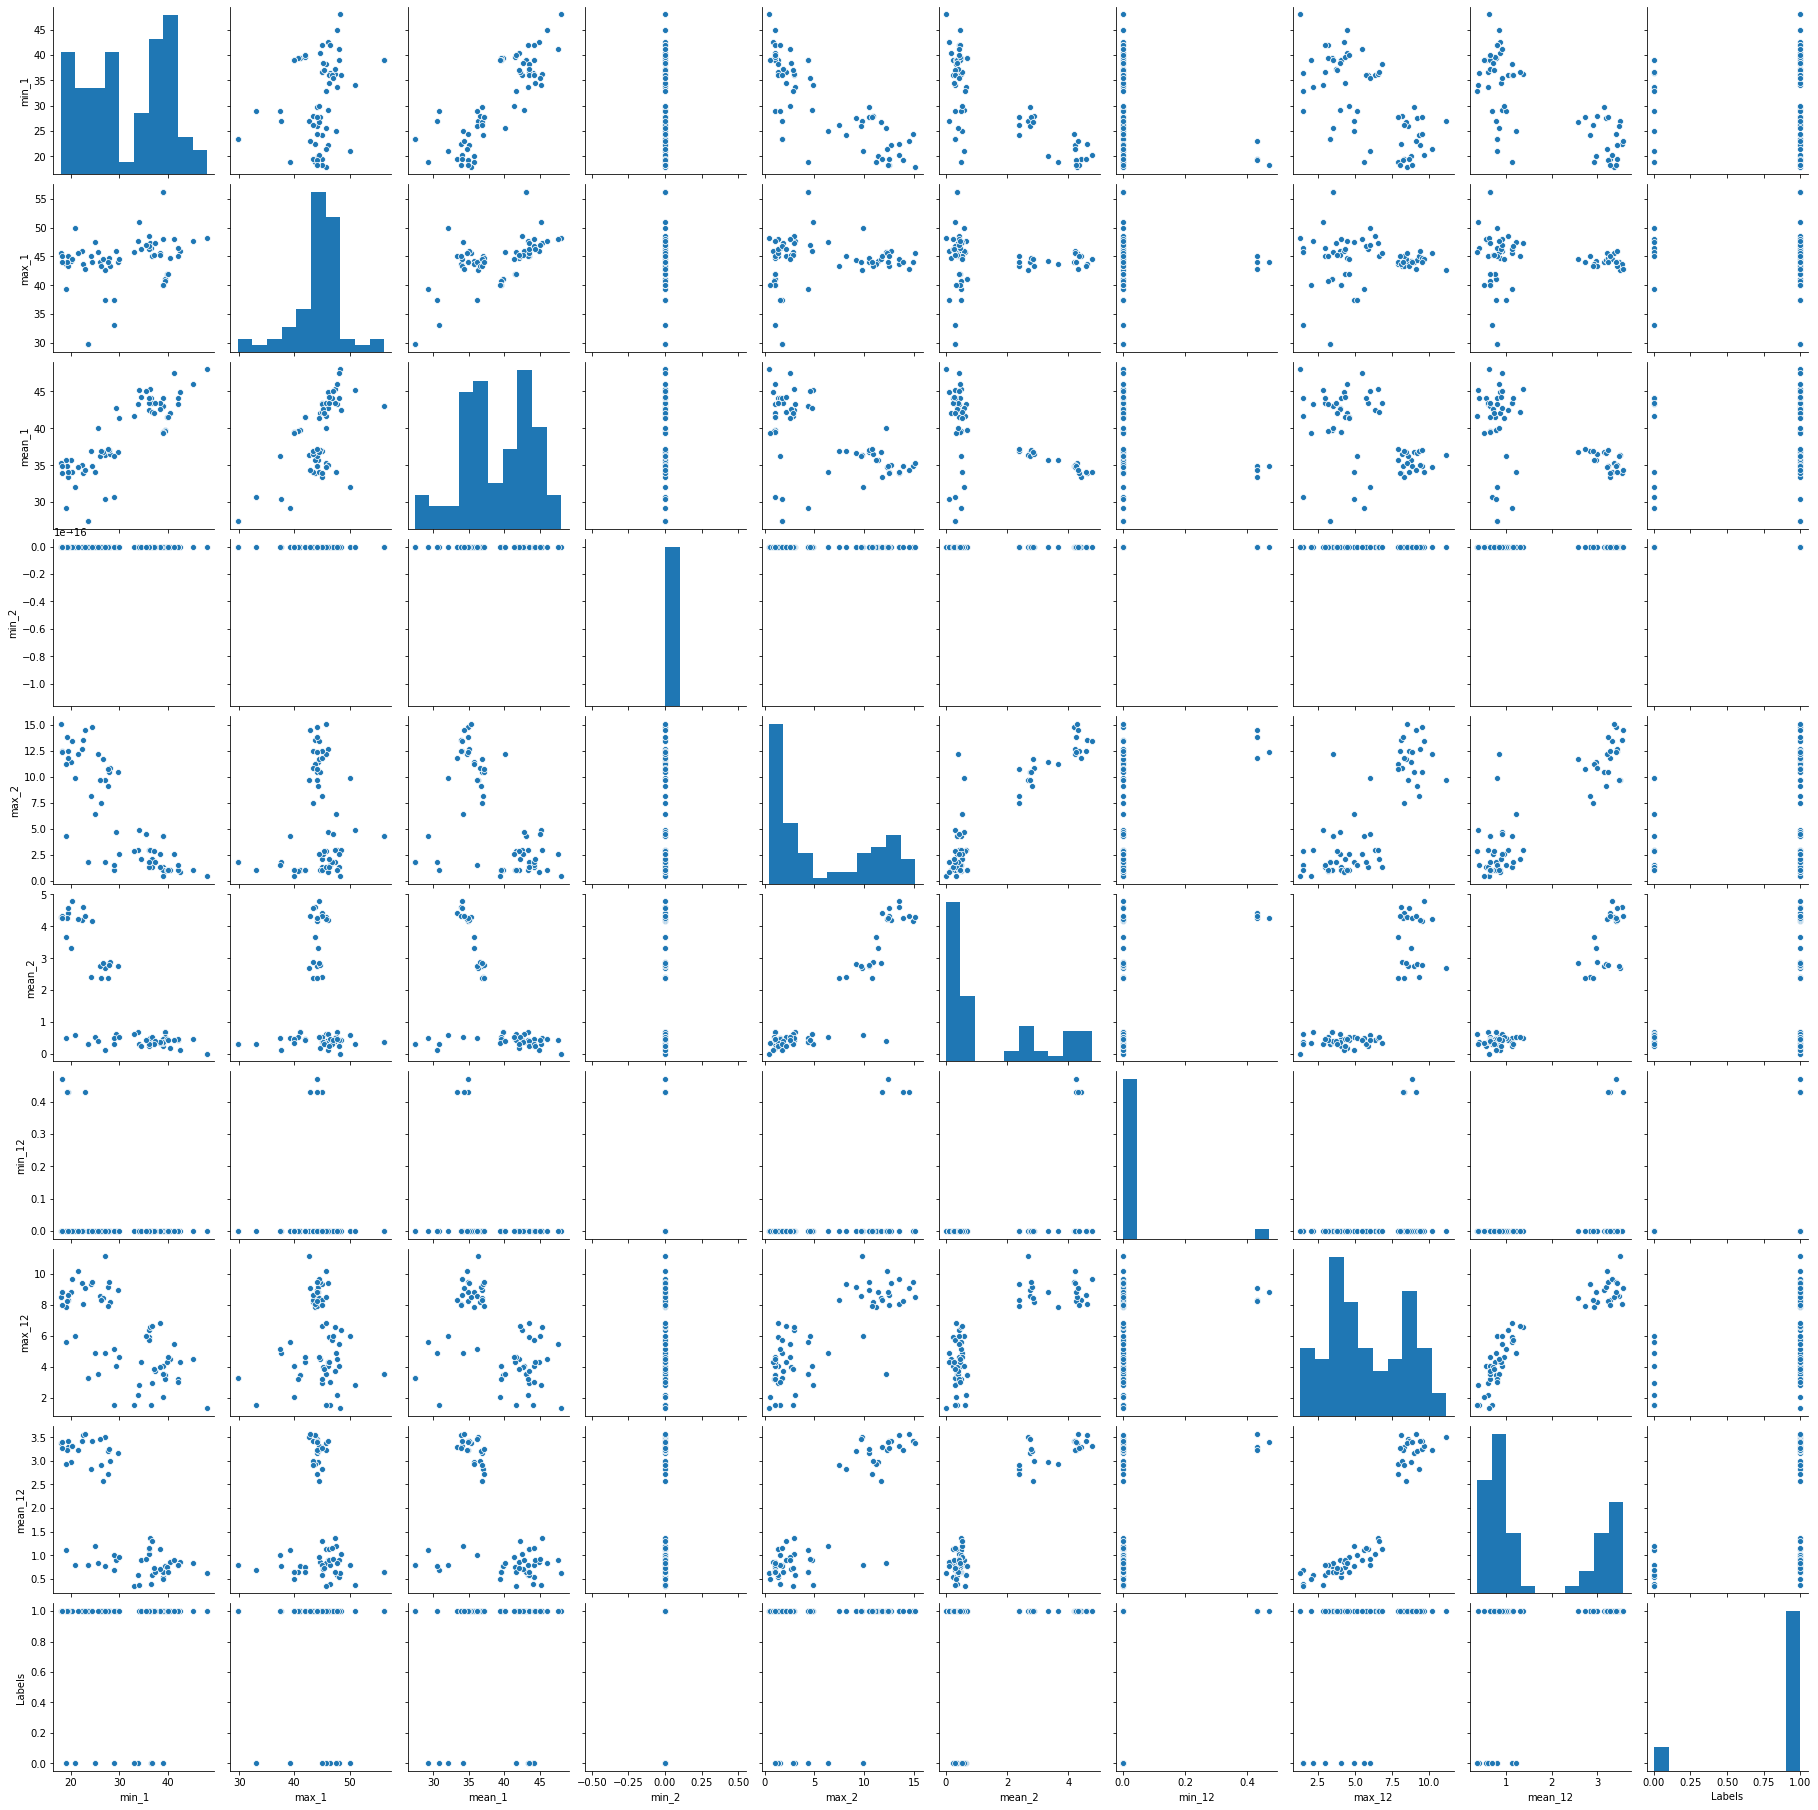

In [37]:
g = sns.pairplot(Spilt_train_feature_Dataframe)

There is no significant difference between two scatterplots.

## iii. Break each time series in your training set into l 2 f1; 2; : : : ; 20g time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python's Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.

In [39]:
# Discrete Split

labels = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
         ,1,1,1,1,1,1,1,1,1,1,1,1]

def discrete_split(length):
    os.chdir("../Data/training_data/")
    extension = 'csv'
    entire_training_data = [i for i in glob.glob('*.{}'.format(extension))]
    header = []
    for index in range (6*length):
        header.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])
    train_discrete_split_list = []
    slice = int(480/length)
    for filename in entire_training_data:
        df = pd.read_csv(filename, skiprows = 4, header = None)
        df = df.drop(columns = df.columns[0])
        df = df.drop(df.index[0])
        list = []
        for i in range(length):
            temp_df = df[(slice*i):(i+1)*slice]
            temp_df.reset_index(drop=True, inplace=True)
            list.append(temp_df)
        final_split_df = pd.concat(list, axis = 1, ignore_index = True)
        train_discrete_split_list.append(final_split_df)
    training_discrete_split_dataframe = pd.concat(train_discrete_split_list, axis=0, ignore_index=True)
    training_discrete_split_dataframe

    training_discrete_split_dataframe = training_discrete_split_dataframe.apply(pd.to_numeric)

    Final_discrete_split_feature_list = []
    for i in range(69):
        Section_Frame = training_discrete_split_dataframe[i*slice:(i+1)*slice]
        feature_list = []
        for j in range(len(Section_Frame.columns)):
            feature_list.append(Section_Frame[Section_Frame.columns[j]].min())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].max())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].mean())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].median())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].std())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.25))
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.75))
        Final_discrete_split_feature_list.append(feature_list)
    FinaldiscretesplitfeatureDataFrame = pd.DataFrame(Final_discrete_split_feature_list, columns = header)
#     return FinaldiscretesplitfeatureDataFrame
    
    Train_discrete_split_feature_Dataframe = FinaldiscretesplitfeatureDataFrame 
    Train_discrete_split_feature_Dataframe['Labels'] = labels
    return Train_discrete_split_feature_Dataframe 

# Logistic Regression Using Backward Selection  

In [40]:
for length in range (1,21):
    df = discrete_split(length)
    X = df.drop(columns = df.columns[-1])
    y = df[df.columns[-1]]
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    rfe = RFE(model, 5)
    rfe = rfe.fit(X,y)
    for i in range(X.shape[1]):
        print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
    print('   ')
    # print(rfe.support_)
    # print(rfe.ranking_)

Column: 0, Selected False, Rank: 15.000
Column: 1, Selected False, Rank: 19.000
Column: 2, Selected False, Rank: 5.000
Column: 3, Selected False, Rank: 18.000
Column: 4, Selected False, Rank: 33.000
Column: 5, Selected False, Rank: 27.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 37.000
Column: 8, Selected False, Rank: 4.000
Column: 9, Selected False, Rank: 21.000
Column: 10, Selected False, Rank: 29.000
Column: 11, Selected False, Rank: 26.000
Column: 12, Selected False, Rank: 31.000
Column: 13, Selected False, Rank: 9.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 11.000
Column: 16, Selected False, Rank: 10.000
Column: 17, Selected False, Rank: 3.000
Column: 18, Selected False, Rank: 35.000
Column: 19, Selected False, Rank: 7.000
Column: 20, Selected False, Rank: 14.000
Column: 21, Selected False, Rank: 38.000
Column: 22, Selected False, Rank: 28.000
Column: 23, Selected False, Rank: 23.000
Column: 24, Selected False, Rank: 2

Column: 0, Selected False, Rank: 50.000
Column: 1, Selected False, Rank: 127.000
Column: 2, Selected False, Rank: 64.000
Column: 3, Selected False, Rank: 47.000
Column: 4, Selected False, Rank: 124.000
Column: 5, Selected False, Rank: 78.000
Column: 6, Selected False, Rank: 29.000
Column: 7, Selected False, Rank: 163.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected False, Rank: 102.000
Column: 10, Selected False, Rank: 116.000
Column: 11, Selected False, Rank: 111.000
Column: 12, Selected False, Rank: 137.000
Column: 13, Selected False, Rank: 63.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 28.000
Column: 16, Selected False, Rank: 140.000
Column: 17, Selected False, Rank: 98.000
Column: 18, Selected False, Rank: 37.000
Column: 19, Selected False, Rank: 27.000
Column: 20, Selected False, Rank: 97.000
Column: 21, Selected False, Rank: 159.000
Column: 22, Selected False, Rank: 45.000
Column: 23, Selected False, Rank: 108.000
Column: 24, Selecte

Column: 0, Selected False, Rank: 93.000
Column: 1, Selected False, Rank: 115.000
Column: 2, Selected False, Rank: 166.000
Column: 3, Selected False, Rank: 180.000
Column: 4, Selected False, Rank: 204.000
Column: 5, Selected False, Rank: 231.000
Column: 6, Selected False, Rank: 54.000
Column: 7, Selected False, Rank: 245.000
Column: 8, Selected False, Rank: 45.000
Column: 9, Selected False, Rank: 165.000
Column: 10, Selected False, Rank: 183.000
Column: 11, Selected False, Rank: 192.000
Column: 12, Selected False, Rank: 209.000
Column: 13, Selected False, Rank: 103.000
Column: 14, Selected False, Rank: 8.000
Column: 15, Selected False, Rank: 44.000
Column: 16, Selected False, Rank: 189.000
Column: 17, Selected False, Rank: 104.000
Column: 18, Selected False, Rank: 52.000
Column: 19, Selected False, Rank: 43.000
Column: 20, Selected False, Rank: 105.000
Column: 21, Selected False, Rank: 243.000
Column: 22, Selected False, Rank: 203.000
Column: 23, Selected False, Rank: 172.000
Column: 24

Column: 0, Selected False, Rank: 128.000
Column: 1, Selected False, Rank: 248.000
Column: 2, Selected False, Rank: 260.000
Column: 3, Selected False, Rank: 267.000
Column: 4, Selected False, Rank: 254.000
Column: 5, Selected False, Rank: 241.000
Column: 6, Selected False, Rank: 201.000
Column: 7, Selected False, Rank: 289.000
Column: 8, Selected False, Rank: 72.000
Column: 9, Selected False, Rank: 202.000
Column: 10, Selected False, Rank: 218.000
Column: 11, Selected False, Rank: 228.000
Column: 12, Selected False, Rank: 275.000
Column: 13, Selected False, Rank: 116.000
Column: 14, Selected False, Rank: 9.000
Column: 15, Selected False, Rank: 68.000
Column: 16, Selected False, Rank: 250.000
Column: 17, Selected False, Rank: 97.000
Column: 18, Selected False, Rank: 79.000
Column: 19, Selected False, Rank: 88.000
Column: 20, Selected False, Rank: 96.000
Column: 21, Selected False, Rank: 271.000
Column: 22, Selected False, Rank: 169.000
Column: 23, Selected False, Rank: 219.000
Column: 24

Column: 0, Selected False, Rank: 120.000
Column: 1, Selected False, Rank: 265.000
Column: 2, Selected False, Rank: 252.000
Column: 3, Selected False, Rank: 239.000
Column: 4, Selected False, Rank: 315.000
Column: 5, Selected False, Rank: 308.000
Column: 6, Selected False, Rank: 93.000
Column: 7, Selected False, Rank: 327.000
Column: 8, Selected False, Rank: 66.000
Column: 9, Selected False, Rank: 230.000
Column: 10, Selected False, Rank: 254.000
Column: 11, Selected False, Rank: 258.000
Column: 12, Selected False, Rank: 309.000
Column: 13, Selected False, Rank: 121.000
Column: 14, Selected False, Rank: 22.000
Column: 15, Selected False, Rank: 94.000
Column: 16, Selected False, Rank: 266.000
Column: 17, Selected False, Rank: 139.000
Column: 18, Selected False, Rank: 97.000
Column: 19, Selected False, Rank: 78.000
Column: 20, Selected False, Rank: 159.000
Column: 21, Selected False, Rank: 302.000
Column: 22, Selected False, Rank: 215.000
Column: 23, Selected False, Rank: 240.000
Column: 

Column: 0, Selected False, Rank: 183.000
Column: 1, Selected False, Rank: 312.000
Column: 2, Selected False, Rank: 336.000
Column: 3, Selected False, Rank: 351.000
Column: 4, Selected False, Rank: 338.000
Column: 5, Selected False, Rank: 318.000
Column: 6, Selected False, Rank: 210.000
Column: 7, Selected False, Rank: 372.000
Column: 8, Selected False, Rank: 70.000
Column: 9, Selected False, Rank: 260.000
Column: 10, Selected False, Rank: 280.000
Column: 11, Selected False, Rank: 289.000
Column: 12, Selected False, Rank: 357.000
Column: 13, Selected False, Rank: 139.000
Column: 14, Selected False, Rank: 13.000
Column: 15, Selected False, Rank: 120.000
Column: 16, Selected False, Rank: 188.000
Column: 17, Selected False, Rank: 119.000
Column: 18, Selected False, Rank: 124.000
Column: 19, Selected False, Rank: 77.000
Column: 20, Selected False, Rank: 320.000
Column: 21, Selected False, Rank: 343.000
Column: 22, Selected False, Rank: 286.000
Column: 23, Selected False, Rank: 266.000
Colum

Column: 0, Selected False, Rank: 204.000
Column: 1, Selected False, Rank: 378.000
Column: 2, Selected False, Rank: 414.000
Column: 3, Selected False, Rank: 383.000
Column: 4, Selected False, Rank: 406.000
Column: 5, Selected False, Rank: 346.000
Column: 6, Selected False, Rank: 340.000
Column: 7, Selected False, Rank: 411.000
Column: 8, Selected False, Rank: 102.000
Column: 9, Selected False, Rank: 293.000
Column: 10, Selected False, Rank: 314.000
Column: 11, Selected False, Rank: 323.000
Column: 12, Selected False, Rank: 398.000
Column: 13, Selected False, Rank: 189.000
Column: 14, Selected False, Rank: 26.000
Column: 15, Selected False, Rank: 305.000
Column: 16, Selected False, Rank: 259.000
Column: 17, Selected False, Rank: 219.000
Column: 18, Selected False, Rank: 191.000
Column: 19, Selected False, Rank: 159.000
Column: 20, Selected False, Rank: 337.000
Column: 21, Selected False, Rank: 382.000
Column: 22, Selected False, Rank: 268.000
Column: 23, Selected False, Rank: 308.000
Col

Column: 0, Selected False, Rank: 153.000
Column: 1, Selected False, Rank: 403.000
Column: 2, Selected False, Rank: 420.000
Column: 3, Selected False, Rank: 441.000
Column: 4, Selected False, Rank: 442.000
Column: 5, Selected False, Rank: 407.000
Column: 6, Selected False, Rank: 349.000
Column: 7, Selected False, Rank: 438.000
Column: 8, Selected False, Rank: 122.000
Column: 9, Selected False, Rank: 296.000
Column: 10, Selected False, Rank: 324.000
Column: 11, Selected False, Rank: 352.000
Column: 12, Selected False, Rank: 418.000
Column: 13, Selected False, Rank: 191.000
Column: 14, Selected False, Rank: 6.000
Column: 15, Selected False, Rank: 342.000
Column: 16, Selected False, Rank: 247.000
Column: 17, Selected False, Rank: 160.000
Column: 18, Selected False, Rank: 212.000
Column: 19, Selected False, Rank: 317.000
Column: 20, Selected False, Rank: 387.000
Column: 21, Selected False, Rank: 424.000
Column: 22, Selected False, Rank: 375.000
Column: 23, Selected False, Rank: 332.000
Colu

Column: 0, Selected False, Rank: 164.000
Column: 1, Selected False, Rank: 488.000
Column: 2, Selected False, Rank: 392.000
Column: 3, Selected False, Rank: 409.000
Column: 4, Selected False, Rank: 479.000
Column: 5, Selected False, Rank: 495.000
Column: 6, Selected False, Rank: 284.000
Column: 7, Selected False, Rank: 484.000
Column: 8, Selected False, Rank: 146.000
Column: 9, Selected False, Rank: 332.000
Column: 10, Selected False, Rank: 347.000
Column: 11, Selected False, Rank: 383.000
Column: 12, Selected False, Rank: 487.000
Column: 13, Selected False, Rank: 226.000
Column: 14, Selected False, Rank: 38.000
Column: 15, Selected False, Rank: 241.000
Column: 16, Selected False, Rank: 344.000
Column: 17, Selected False, Rank: 155.000
Column: 18, Selected False, Rank: 256.000
Column: 19, Selected False, Rank: 405.000
Column: 20, Selected False, Rank: 376.000
Column: 21, Selected False, Rank: 474.000
Column: 22, Selected False, Rank: 343.000
Column: 23, Selected False, Rank: 398.000
Col

Column: 0, Selected False, Rank: 264.000
Column: 1, Selected False, Rank: 432.000
Column: 2, Selected False, Rank: 414.000
Column: 3, Selected False, Rank: 474.000
Column: 4, Selected False, Rank: 498.000
Column: 5, Selected False, Rank: 521.000
Column: 6, Selected False, Rank: 273.000
Column: 7, Selected False, Rank: 516.000
Column: 8, Selected False, Rank: 136.000
Column: 9, Selected False, Rank: 357.000
Column: 10, Selected False, Rank: 373.000
Column: 11, Selected False, Rank: 425.000
Column: 12, Selected False, Rank: 477.000
Column: 13, Selected False, Rank: 220.000
Column: 14, Selected False, Rank: 94.000
Column: 15, Selected False, Rank: 353.000
Column: 16, Selected False, Rank: 304.000
Column: 17, Selected False, Rank: 173.000
Column: 18, Selected False, Rank: 342.000
Column: 19, Selected False, Rank: 333.000
Column: 20, Selected False, Rank: 495.000
Column: 21, Selected False, Rank: 489.000
Column: 22, Selected False, Rank: 497.000
Column: 23, Selected False, Rank: 395.000
Col

Column: 0, Selected False, Rank: 280.000
Column: 1, Selected False, Rank: 533.000
Column: 2, Selected False, Rank: 557.000
Column: 3, Selected False, Rank: 553.000
Column: 4, Selected False, Rank: 582.000
Column: 5, Selected False, Rank: 506.000
Column: 6, Selected False, Rank: 509.000
Column: 7, Selected False, Rank: 567.000
Column: 8, Selected False, Rank: 161.000
Column: 9, Selected False, Rank: 401.000
Column: 10, Selected False, Rank: 408.000
Column: 11, Selected False, Rank: 466.000
Column: 12, Selected False, Rank: 569.000
Column: 13, Selected False, Rank: 234.000
Column: 14, Selected False, Rank: 86.000
Column: 15, Selected False, Rank: 283.000
Column: 16, Selected False, Rank: 355.000
Column: 17, Selected False, Rank: 295.000
Column: 18, Selected False, Rank: 329.000
Column: 19, Selected False, Rank: 284.000
Column: 20, Selected False, Rank: 540.000
Column: 21, Selected False, Rank: 536.000
Column: 22, Selected False, Rank: 403.000
Column: 23, Selected False, Rank: 471.000
Col

Column: 0, Selected False, Rank: 224.000
Column: 1, Selected False, Rank: 578.000
Column: 2, Selected False, Rank: 573.000
Column: 3, Selected False, Rank: 592.000
Column: 4, Selected False, Rank: 583.000
Column: 5, Selected False, Rank: 602.000
Column: 6, Selected False, Rank: 518.000
Column: 7, Selected False, Rank: 605.000
Column: 8, Selected False, Rank: 182.000
Column: 9, Selected False, Rank: 414.000
Column: 10, Selected False, Rank: 434.000
Column: 11, Selected False, Rank: 496.000
Column: 12, Selected False, Rank: 557.000
Column: 13, Selected False, Rank: 284.000
Column: 14, Selected False, Rank: 73.000
Column: 15, Selected False, Rank: 300.000
Column: 16, Selected False, Rank: 332.000
Column: 17, Selected False, Rank: 618.000
Column: 18, Selected False, Rank: 343.000
Column: 19, Selected False, Rank: 397.000
Column: 20, Selected False, Rank: 446.000
Column: 21, Selected False, Rank: 568.000
Column: 22, Selected False, Rank: 387.000
Column: 23, Selected False, Rank: 511.000
Col

Column: 0, Selected False, Rank: 269.000
Column: 1, Selected False, Rank: 598.000
Column: 2, Selected False, Rank: 628.000
Column: 3, Selected False, Rank: 651.000
Column: 4, Selected False, Rank: 617.000
Column: 5, Selected False, Rank: 624.000
Column: 6, Selected False, Rank: 583.000
Column: 7, Selected False, Rank: 641.000
Column: 8, Selected False, Rank: 198.000
Column: 9, Selected False, Rank: 463.000
Column: 10, Selected False, Rank: 483.000
Column: 11, Selected False, Rank: 537.000
Column: 12, Selected False, Rank: 573.000
Column: 13, Selected False, Rank: 287.000
Column: 14, Selected False, Rank: 106.000
Column: 15, Selected False, Rank: 346.000
Column: 16, Selected False, Rank: 487.000
Column: 17, Selected False, Rank: 667.000
Column: 18, Selected False, Rank: 440.000
Column: 19, Selected False, Rank: 523.000
Column: 20, Selected False, Rank: 535.000
Column: 21, Selected False, Rank: 594.000
Column: 22, Selected False, Rank: 473.000
Column: 23, Selected False, Rank: 542.000
Co

Column: 0, Selected False, Rank: 343.000
Column: 1, Selected False, Rank: 624.000
Column: 2, Selected False, Rank: 701.000
Column: 3, Selected False, Rank: 526.000
Column: 4, Selected False, Rank: 674.000
Column: 5, Selected False, Rank: 640.000
Column: 6, Selected False, Rank: 629.000
Column: 7, Selected False, Rank: 682.000
Column: 8, Selected False, Rank: 215.000
Column: 9, Selected False, Rank: 469.000
Column: 10, Selected False, Rank: 473.000
Column: 11, Selected False, Rank: 552.000
Column: 12, Selected False, Rank: 578.000
Column: 13, Selected False, Rank: 313.000
Column: 14, Selected False, Rank: 161.000
Column: 15, Selected False, Rank: 397.000
Column: 16, Selected False, Rank: 414.000
Column: 17, Selected False, Rank: 567.000
Column: 18, Selected False, Rank: 406.000
Column: 19, Selected False, Rank: 342.000
Column: 20, Selected False, Rank: 661.000
Column: 21, Selected False, Rank: 633.000
Column: 22, Selected False, Rank: 693.000
Column: 23, Selected False, Rank: 533.000
Co

Column: 0, Selected False, Rank: 356.000
Column: 1, Selected False, Rank: 698.000
Column: 2, Selected False, Rank: 717.000
Column: 3, Selected False, Rank: 463.000
Column: 4, Selected False, Rank: 704.000
Column: 5, Selected False, Rank: 727.000
Column: 6, Selected False, Rank: 702.000
Column: 7, Selected False, Rank: 733.000
Column: 8, Selected False, Rank: 229.000
Column: 9, Selected False, Rank: 523.000
Column: 10, Selected False, Rank: 551.000
Column: 11, Selected False, Rank: 599.000
Column: 12, Selected False, Rank: 645.000
Column: 13, Selected False, Rank: 384.000
Column: 14, Selected False, Rank: 160.000
Column: 15, Selected False, Rank: 430.000
Column: 16, Selected False, Rank: 594.000
Column: 17, Selected False, Rank: 585.000
Column: 18, Selected False, Rank: 461.000
Column: 19, Selected False, Rank: 457.000
Column: 20, Selected False, Rank: 683.000
Column: 21, Selected False, Rank: 561.000
Column: 22, Selected False, Rank: 712.000
Column: 23, Selected False, Rank: 576.000
Co

Column: 0, Selected False, Rank: 473.000
Column: 1, Selected False, Rank: 705.000
Column: 2, Selected False, Rank: 746.000
Column: 3, Selected False, Rank: 535.000
Column: 4, Selected False, Rank: 759.000
Column: 5, Selected False, Rank: 771.000
Column: 6, Selected False, Rank: 637.000
Column: 7, Selected False, Rank: 766.000
Column: 8, Selected False, Rank: 222.000
Column: 9, Selected False, Rank: 518.000
Column: 10, Selected False, Rank: 560.000
Column: 11, Selected False, Rank: 636.000
Column: 12, Selected False, Rank: 655.000
Column: 13, Selected False, Rank: 336.000
Column: 14, Selected False, Rank: 169.000
Column: 15, Selected False, Rank: 512.000
Column: 16, Selected False, Rank: 634.000
Column: 17, Selected False, Rank: 549.000
Column: 18, Selected False, Rank: 464.000
Column: 19, Selected False, Rank: 521.000
Column: 20, Selected False, Rank: 603.000
Column: 21, Selected False, Rank: 601.000
Column: 22, Selected False, Rank: 781.000
Column: 23, Selected False, Rank: 597.000
Co

Column: 0, Selected False, Rank: 510.000
Column: 1, Selected False, Rank: 705.000
Column: 2, Selected False, Rank: 788.000
Column: 3, Selected False, Rank: 572.000
Column: 4, Selected False, Rank: 775.000
Column: 5, Selected False, Rank: 776.000
Column: 6, Selected False, Rank: 704.000
Column: 7, Selected False, Rank: 811.000
Column: 8, Selected False, Rank: 270.000
Column: 9, Selected False, Rank: 575.000
Column: 10, Selected False, Rank: 587.000
Column: 11, Selected False, Rank: 681.000
Column: 12, Selected False, Rank: 722.000
Column: 13, Selected False, Rank: 408.000
Column: 14, Selected False, Rank: 153.000
Column: 15, Selected False, Rank: 496.000
Column: 16, Selected False, Rank: 748.000
Column: 17, Selected False, Rank: 547.000
Column: 18, Selected False, Rank: 458.000
Column: 19, Selected False, Rank: 494.000
Column: 20, Selected False, Rank: 757.000
Column: 21, Selected False, Rank: 647.000
Column: 22, Selected False, Rank: 780.000
Column: 23, Selected False, Rank: 687.000
Co

### Cross Validation

In [44]:
for length in range (1,21):
    df = discrete_split(length)
    X = df.drop(columns = df.columns[-1])
    y = df[df.columns[-1]]
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    selector = RFECV(model, step=1, cv=5, scoring = 'accuracy')
    selector = selector.fit(X, y)
    scores = selector.score(X, y)
    print(length)
    print(scores)
    TF = selector.support_
    n = np.sum(TF)
    print(n)
    print('  ')

### Stratified Cross Validation

In [43]:
for length in range (1,21):
    df = discrete_split(length)
    X = df.drop(columns = df.columns[-1])
    y = df[df.columns[-1]]
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    selector = RFECV(model, step=1, cv=StratifiedKFold(5), scoring = 'accuracy')
    selector = selector.fit(X, y)
    scores = selector.score(X, y)
    print(length)
    print(scores)
    TF = selector.support_
    n = np.sum(TF)
    print(n)
    print('  ')

Best l :  3

selectedFeatures :  ['min(5)', '3rd quart(5)', '3rd quart(7)', 'max(18)']

## iv. Report the confusion matrix and show the ROC and AUC for your classifieron train data. Report the parameters of your logistic regression Bi's as well  as the p-values associated with them.

----------"Confusion Matrix"----------
Predicted  0   1  All
True                 
0          9   0    9
1          0  60   60
All        9  60   69
----------"Params"----------
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.07877700732989e-10
            Iterations: 40
            Function evaluations: 45
            Gradient evaluations: 40
min(5)          -2.393852
3rd quart(5)   -18.877688
3rd quart(7)     9.218630
max(18)         15.575264
dtype: float64
-----------"P-values"-------------
min(5)          1.0
3rd quart(5)    1.0
3rd quart(7)    1.0
max(18)         1.0
dtype: float64


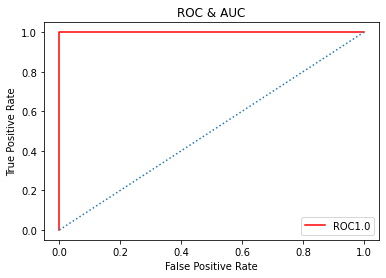

In [45]:
df = discrete_split(3)
X_trainData = df[['min(5)','3rd quart(5)','3rd quart(7)','max(18)']]
y_trainData = df[df.columns[-1]]

LogitModel = LogisticRegression()
LogitModel.fit(X_trainData, y_trainData)
Y_pred = LogitModel.predict(X_trainData)

falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_trainData, Y_pred)

area = auc(falsePositiveRate, truePositiveRate)
crosstab = pd.crosstab(y_trainData, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print("----------\"Confusion Matrix\"----------")
print(crosstab)
print("----------\"Params\"----------")
statLogitModel = sm.Logit(y_trainData, X_trainData).fit_regularized()
print(statLogitModel.params)
print("-----------\"P-values\"-------------")
print(statLogitModel.pvalues)

plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()

## v. Test the classifier on the test set. Remember to break the time series inyour test set into the same number of time series into which you broke yourtraining set. Remember that the classifier has to be tested using the featuresextracted from the test set. Compare the accuracy on the test set with thecross-validation accuracy you obtained previously.

In [46]:
# Discrete Split

labels_test = [0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

def discrete_split_test(length):
    os.chdir("../Data/testing_data/")
    extension = 'csv'
    entire_testing_data = [i for i in glob.glob('*.{}'.format(extension))]
    header = []
    for index in range (6*length):
        header.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])
    test_discrete_split_list = []
    slice = int(480/length)
    for filename in entire_testing_data:
        df = pd.read_csv(filename, skiprows = 4, header = None)
        df = df.drop(columns = df.columns[0])
        df = df.drop(df.index[0])
        list = []
        for i in range(length):
            temp_df = df[(slice*i):(i+1)*slice]
            temp_df.reset_index(drop=True, inplace=True)
            list.append(temp_df)
        final_split_df = pd.concat(list, axis = 1, ignore_index = True)
        test_discrete_split_list.append(final_split_df)
    testing_discrete_split_dataframe = pd.concat(test_discrete_split_list, axis=0, ignore_index=True)
    testing_discrete_split_dataframe

    testing_discrete_split_dataframe = testing_discrete_split_dataframe.apply(pd.to_numeric)

    Final_discrete_split_feature_list = []
    for i in range(19):
        Section_Frame = testing_discrete_split_dataframe[i*slice:(i+1)*slice]
        feature_list = []
        for j in range(len(Section_Frame.columns)):
            feature_list.append(Section_Frame[Section_Frame.columns[j]].min())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].max())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].mean())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].median())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].std())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.25))
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.75))
        Final_discrete_split_feature_list.append(feature_list)
    FinaldiscretesplitfeatureDataFrame = pd.DataFrame(Final_discrete_split_feature_list, columns = header)
#     return FinaldiscretesplitfeatureDataFrame
    
    Test_discrete_split_feature_Dataframe = FinaldiscretesplitfeatureDataFrame 
    Test_discrete_split_feature_Dataframe['Labels'] = labels_test
    return Test_discrete_split_feature_Dataframe 

In [47]:
discrete_split_test(3)
X_testData = df[['min(5)','3rd quart(5)','3rd quart(7)','max(18)']]
y_testData = df[df.columns[-1]]

logitModel = LogisticRegression()
logitModel.fit(X_testData, y_testData)
y_predict = logitModel.predict(X_testData)
print("The accuracy on the test set is ",logitModel.score(X_testData, y_testData))

The accuracy on the test set is  1.0


The accuracy on the test set with cross validation accuracy is the same as the score when we use train dataset.

## vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters? 

Yes the classes seem to be well-separated to cause instability in calculating logistic regression parameters

## vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model. 

In [98]:
# Discrete Split

labels = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
         ,1,1,1,1,1,1,1,1,1,1,1,1]

def discrete_split(length):
    os.chdir("../Data/training_data/")
    extension = 'csv'
    entire_training_data = [i for i in glob.glob('*.{}'.format(extension))]
    header = []
    for index in range (6*length):
        header.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])
    train_discrete_split_list = []
    slice = int(480/length)
    for filename in entire_training_data:
        df = pd.read_csv(filename, skiprows = 4, header = None)
        df = df.drop(columns = df.columns[0])
        df = df.drop(df.index[0])
        list = []
        for i in range(length):
            temp_df = df[(slice*i):(i+1)*slice]
            temp_df.reset_index(drop=True, inplace=True)
            list.append(temp_df)
        final_split_df = pd.concat(list, axis = 1, ignore_index = True)
        train_discrete_split_list.append(final_split_df)
    training_discrete_split_dataframe = pd.concat(train_discrete_split_list, axis=0, ignore_index=True)
    training_discrete_split_dataframe

    training_discrete_split_dataframe = training_discrete_split_dataframe.apply(pd.to_numeric)

    Final_discrete_split_feature_list = []
    for i in range(69):
        Section_Frame = training_discrete_split_dataframe[i*slice:(i+1)*slice]
        feature_list = []
        for j in range(len(Section_Frame.columns)):
            feature_list.append(Section_Frame[Section_Frame.columns[j]].min())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].max())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].mean())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].median())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].std())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.25))
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.75))
        Final_discrete_split_feature_list.append(feature_list)
    FinaldiscretesplitfeatureDataFrame = pd.DataFrame(Final_discrete_split_feature_list, columns = header)
#     return FinaldiscretesplitfeatureDataFrame
    
    Train_discrete_split_feature_Dataframe = FinaldiscretesplitfeatureDataFrame 
    Train_discrete_split_feature_Dataframe['Labels'] = labels
    return Train_discrete_split_feature_Dataframe 

-----------"Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          60   0   60
1           0  60   60
All        60  60  120


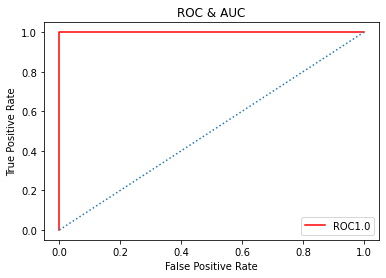

-----------"AUC value"-------------
AUC :  1.0


In [49]:
df = discrete_split(3)
X_trainData = df[['min(5)','3rd quart(5)','3rd quart(7)','max(18)','Labels']]
bending_df = X_trainData[df.Labels == 0]
other_df = X_trainData[df.Labels == 1]

BendingDF_1 = resample(bending_df, replace=True, n_samples=60, random_state=2333)
BendingDF_2 = pd.concat([other_df, BendingDF_1])

X_data = BendingDF_2[list(BendingDF_2.columns.values)[:-1]]
y_data = BendingDF_2['Labels']

logitModel = LogisticRegression()
logitModel.fit(X_data, y_data)
y_predict = logitModel.predict(X_data)
crosstab = pd.crosstab(y_data, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)
falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_data, y_predict)

area = auc(falsePositiveRate, truePositiveRate)
plt.plot(falsePositiveRate, truePositiveRate, color='red', label='ROC' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC')
plt.legend()
plt.show()
print("-----------\"AUC value\"-------------")
print("AUC : ", area)

# (e) Binary Classification Using L1-penalized logistic regression 

## i. Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and lamda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for lambda automatically.

----------"Test Error Rate"----------
Test Error Rate :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
----------"Best L"----------
Best l is :  1


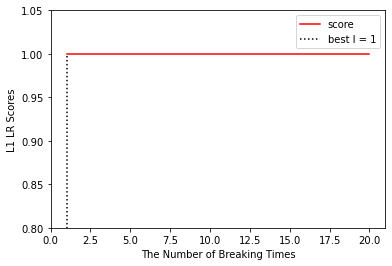

In [52]:
logitCVTestScores = list()
for length in range(1,21):
    df = discrete_split(length)
    X_data = df[list(df.columns.values)[:-1]]
    y_data = df['Labels']
    logitModel = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(X_data, y_data)
    logitCVTestScores.append(logitModel.score(X_data, y_data))

print("----------\"Test Error Rate\"----------")
print("Test Error Rate : ", logitCVTestScores)
best_L = logitCVTestScores.index(max(logitCVTestScores)) + 1
print("----------\"Best L\"----------")
print("Best l is : ", best_L)

plt.plot(range(1, 21), logitCVTestScores, color='red', label='score')
plt.vlines(best_L, 0, 1, linestyles='dotted', label="best l = " + str(best_L))
plt.xlabel('The Number of Breaking Times')
plt.ylabel('L1 LR Scores')
plt.xlim(0, 21)
plt.ylim(0.8, 1.05)
plt.legend()
plt.show()

## ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

LASSORegression performs better and also easier to implement, obviously.

# (f) Multi-class Classification (The Realistic Case)

## i. Find the best l in the same way as you found it in 1(e)i to build an L1-penalized multinomial regression model to classify all activities in your trainingset. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [53]:
# Discrete Split

labels = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,
          4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5]

def discrete_split(length):
    os.chdir("../Data/training_data/")
    extension = 'csv'
    entire_training_data = [i for i in glob.glob('*.{}'.format(extension))]
    header = []
    for index in range (6*length):
        header.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])
    train_discrete_split_list = []
    slice = int(480/length)
    for filename in entire_training_data:
        df = pd.read_csv(filename, skiprows = 4, header = None)
        df = df.drop(columns = df.columns[0])
        df = df.drop(df.index[0])
        list = []
        for i in range(length):
            temp_df = df[(slice*i):(i+1)*slice]
            temp_df.reset_index(drop=True, inplace=True)
            list.append(temp_df)
        final_split_df = pd.concat(list, axis = 1, ignore_index = True)
        train_discrete_split_list.append(final_split_df)
    training_discrete_split_dataframe = pd.concat(train_discrete_split_list, axis=0, ignore_index=True)
    training_discrete_split_dataframe

    training_discrete_split_dataframe = training_discrete_split_dataframe.apply(pd.to_numeric)

    Final_discrete_split_feature_list = []
    for i in range(69):
        Section_Frame = training_discrete_split_dataframe[i*slice:(i+1)*slice]
        feature_list = []
        for j in range(len(Section_Frame.columns)):
            feature_list.append(Section_Frame[Section_Frame.columns[j]].min())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].max())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].mean())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].median())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].std())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.25))
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.75))
        Final_discrete_split_feature_list.append(feature_list)
    FinaldiscretesplitfeatureDataFrame = pd.DataFrame(Final_discrete_split_feature_list, columns = header)
#     return FinaldiscretesplitfeatureDataFrame
    
    Train_discrete_split_feature_Dataframe = FinaldiscretesplitfeatureDataFrame 
    Train_discrete_split_feature_Dataframe['Labels'] = labels
    return Train_discrete_split_feature_Dataframe 

In [54]:
# Discrete Split

labels_test = [0,0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]

def discrete_split_test(length):
    os.chdir("../Data/testing_data/")
    extension = 'csv'
    entire_testing_data = [i for i in glob.glob('*.{}'.format(extension))]
    header = []
    for index in range (6*length):
        header.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])
    test_discrete_split_list = []
    slice = int(480/length)
    for filename in entire_testing_data:
        df = pd.read_csv(filename, skiprows = 4, header = None)
        df = df.drop(columns = df.columns[0])
        df = df.drop(df.index[0])
        list = []
        for i in range(length):
            temp_df = df[(slice*i):(i+1)*slice]
            temp_df.reset_index(drop=True, inplace=True)
            list.append(temp_df)
        final_split_df = pd.concat(list, axis = 1, ignore_index = True)
        test_discrete_split_list.append(final_split_df)
    testing_discrete_split_dataframe = pd.concat(test_discrete_split_list, axis=0, ignore_index=True)
    testing_discrete_split_dataframe

    testing_discrete_split_dataframe = testing_discrete_split_dataframe.apply(pd.to_numeric)

    Final_discrete_split_feature_list = []
    for i in range(19):
        Section_Frame = testing_discrete_split_dataframe[i*slice:(i+1)*slice]
        feature_list = []
        for j in range(len(Section_Frame.columns)):
            feature_list.append(Section_Frame[Section_Frame.columns[j]].min())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].max())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].mean())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].median())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].std())
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.25))
            feature_list.append(Section_Frame[Section_Frame.columns[j]].quantile(q = 0.75))
        Final_discrete_split_feature_list.append(feature_list)
    FinaldiscretesplitfeatureDataFrame = pd.DataFrame(Final_discrete_split_feature_list, columns = header)
#     return FinaldiscretesplitfeatureDataFrame
    
    Test_discrete_split_feature_Dataframe = FinaldiscretesplitfeatureDataFrame 
    Test_discrete_split_feature_Dataframe['Labels'] = labels_test
    return Test_discrete_split_feature_Dataframe 

----------"Test Error Rate"----------
Test Error Rate :  [0.052631578947368474, 0.21052631578947367, 0.26315789473684215, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.1578947368421053, 0.21052631578947367, 0.1578947368421053, 0.21052631578947367, 0.26315789473684215, 0.1578947368421053, 0.1578947368421053, 0.21052631578947367, 0.1578947368421053, 0.10526315789473684, 0.21052631578947367]
-----------"Best L"-------------
Best l :  1
-----------"Confusion Matrix"-------------
Predicted  0  1  2  5  All
True                      
0          4  0  0  0    4
1          0  3  0  0    3
2          0  0  3  0    3
3          3  0  0  0    3
4          2  0  1  0    3
5          0  0  0  3    3
All        9  3  4  3   19


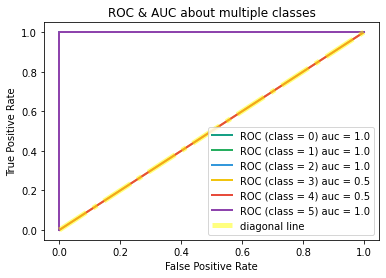

In [56]:
logitCVTestErrorRateList = list()

for length in range(1,21):
    df_train = discrete_split(length)
    df_test = discrete_split_test(length)
    
    X_train = df_train[list(df_train.columns.values)[:-1]]
    y_train = df_train['Labels']

    X_test = df_test[list(df_test.columns.values)[:-1]]
    y_test = df_test['Labels']

    logitModel = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(X_train, y_train)
    logitCVTestErrorRateList.append(1 - logitModel.score(X_test, y_test))
    
print("----------\"Test Error Rate\"----------")
print("Test Error Rate : ", logitCVTestErrorRateList)

best_L = logitCVTestErrorRateList.index(min(logitCVTestErrorRateList)) + 1
print("-----------\"Best L\"-------------")
print("Best l : ", best_L)

df_train = discrete_split(length)
df_test = discrete_split_test(length)

X_train = df_train[list(df_train.columns.values)[:-1]]
y_train = df_train['Labels']

X_test = df_test[list(df_test.columns.values)[:-1]]
y_test = df_test['Labels']

bin_y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5])
bin_y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

classifier = OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5), penalty="l1", solver="liblinear")).fit(X_train, bin_y_train)

# Confusion Matrix
y_score = classifier.fit(X_train, bin_y_train).decision_function(X_test)
y_predict = classifier.predict(X_test)
crosstab = pd.crosstab(bin_y_test.argmax(axis=1), y_predict.argmax(axis=1), rownames=['True'],colnames=['Predicted'], 
                       margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)

# Compute ROC curve and AUC for each class
falsePositiveRate = dict()
truePositiveRate = dict()
areas = dict()
for i in range(bin_y_train.shape[1]):
    falsePositiveRate[i], truePositiveRate[i], _ = roc_curve(bin_y_test[:, i], y_score[:, i])
    areas[i] = auc(falsePositiveRate[i], truePositiveRate[i])

colors = ['#16a085', '#27ae60', '#3498db', '#f1c40f', '#e74c3c', '#8e44ad']
for index in range(bin_y_train.shape[1]):
    plt.plot(falsePositiveRate[index], truePositiveRate[index], color=colors[index],
             label='ROC (class = {}) auc = {}'.format(index, str(areas[index])), linewidth=2, linestyle='-')

plt.plot([0, 1], [0, 1], linestyle='-.', linewidth=5, alpha=0.5, color='yellow', label='diagonal line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC about multiple classes')
plt.legend()
plt.show()

## ii. Repeat 1(f)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

In [59]:
gaussianTestErrorRateList = list()

for length in range(1,21):
    df_train = discrete_split(length)
    df_test = discrete_split_test(length)
    
    X_train = df_train[list(df_train.columns.values)[:-1]]
    y_train = df_train['Labels']

    X_test = df_test[list(df_test.columns.values)[:-1]]
    y_test = df_test['Labels']

    gaussianClassifier = GaussianNB()
    gaussianTestErrorRateList.append(1 - np.mean(cross_val_score(gaussianClassifier, X_train, y_train, cv=5)))
    
print("----------\"Test Error Rate\"----------")
print("Test Error Rate : ", gaussianTestErrorRateList)

best_L = gaussianTestErrorRateList.index(min(gaussianTestErrorRateList)) + 1
print("-----------\"Best L\"-------------")
print("Best l : ", best_L)

# calculate confusion matrix

df_train = discrete_split(length)
df_test = discrete_split_test(length)

X_train = df_train[list(df_train.columns.values)[:-1]]
y_train = df_train['Labels']

X_test = df_test[list(df_test.columns.values)[:-1]]
y_test = df_test['Labels']


params = {}
classifier = GridSearchCV(GaussianNB(), cv=StratifiedKFold(5), param_grid=params).fit(X_train, y_train)

y_predict = classifier.predict(X_test)
# Confusion Matrix

crosstab = pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)

----------"Test Error Rate"----------
Test Error Rate :  [0.14835164835164816, 0.143956043956044, 0.2593406593406593, 0.3043956043956044, 0.289010989010989, 0.27472527472527475, 0.3318681318681318, 0.2604395604395604, 0.4054945054945055, 0.3769230769230769, 0.34835164835164834, 0.4032967032967033, 0.30329670329670333, 0.34725274725274724, 0.39120879120879126, 0.39230769230769236, 0.4483516483516483, 0.4054945054945055, 0.42087912087912094, 0.4054945054945055]
-----------"Best L"-------------
Best l :  2
-----------"Confusion Matrix"-------------
Predicted  1  2  3  4  5  All
True                         
0          0  2  0  2  0    4
1          3  0  0  0  0    3
2          1  2  0  0  0    3
3          0  0  3  0  0    3
4          1  0  2  0  0    3
5          0  0  0  0  3    3
All        5  4  5  2  3   19


In [58]:
multinomialTestErrorRateList = list()

for length in range(1,21):
    df_train = discrete_split(length)
    df_test = discrete_split_test(length)
    
    X_train = df_train[list(df_train.columns.values)[:-1]]
    y_train = df_train['Labels']

    X_test = df_test[list(df_test.columns.values)[:-1]]
    y_test = df_test['Labels']

    multinomialClassifier = MultinomialNB()
    multinomialTestErrorRateList.append(1 - np.mean(cross_val_score(multinomialClassifier, X_train, y_train, cv=5)))
    
print("-----------\"Test Error Rate\"-------------")
print("Test Error Rate : ", multinomialTestErrorRateList)
# # find the best l
best_L = multinomialTestErrorRateList.index(min(multinomialTestErrorRateList)) + 1
print("-----------\"Best L\"-------------")
print("Best l : ", best_L)

# calculate confusion matrix

df_train = discrete_split(length)
df_test = discrete_split_test(length)

X_train = df_train[list(df_train.columns.values)[:-1]]
y_train = df_train['Labels']

X_test = df_test[list(df_test.columns.values)[:-1]]
y_test = df_test['Labels']


params = {}
classifier = GridSearchCV(MultinomialNB(), cv=StratifiedKFold(5), param_grid=params).fit(X_train, y_train)

y_predict = classifier.predict(X_test)
# Confusion Matrix

crosstab = pd.crosstab(y_test, y_predict, rownames=['True'],colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(crosstab)

-----------"Test Error Rate"-------------
Test Error Rate :  [0.1890109890109889, 0.1879120879120879, 0.20329670329670324, 0.1879120879120879, 0.1450549450549451, 0.15934065934065933, 0.1450549450549451, 0.15934065934065944, 0.15934065934065933, 0.15934065934065933, 0.15934065934065933, 0.189010989010989, 0.15934065934065944, 0.17472527472527477, 0.17472527472527477, 0.17472527472527477, 0.189010989010989, 0.189010989010989, 0.17472527472527477, 0.189010989010989]
-----------"Best L"-------------
Best l :  5
-----------"Confusion Matrix"-------------
Predicted  0  1  2  3  4  5  All
True                            
0          4  0  0  0  0  0    4
1          0  3  0  0  0  0    3
2          0  0  3  0  0  0    3
3          0  0  0  2  1  0    3
4          0  0  0  0  3  0    3
5          0  0  0  0  0  3    3
All        4  3  3  2  4  3   19


## iii. Which method is better for multi-class classification in this problem?

I think the multinomial is better than the gaussian in this topic because the average of score I got from multinomial Naive Bayes is higher than the Gaussian's Naive Bayes.

# 2. ISLR 3.7.4

(a) Without knowing more details about the training data, it is difficult to know which training RSS is lower between linear or cubic. However, as the true relationship between X and Y is linear, we may expect the least squares line to be close to the true regression line, and consequently the RSS for the linear regression may be lower than for the cubic regression.

(b) In this case the test RSS depends upon the test data, so we have not enough information to conclude. However, we may assume that polynomial regression will have a higher test RSS as the overfit from training would have more error than the linear regression.

(c) Polynomial regression has lower train RSS than the linear fit because of higher flexibility: no matter what the underlying true relationship is, the more flexible model will closely follow points and reduce train RSS.

(d) There is not enough information to tell which test RSS would be lower for either regression given the problem statement is defined as not knowing “how far it is from linear”. If it is closer to linear than cubic, the linear regression test RSS could be lower than the cubic regression test RSS. Or, if it is closer to cubic than linear, the cubic regression test RSS could be lower than the linear regression test RSS. It is dues to bias-variance tradeoff: it is not clear what level of flexibility will fit data better.

# 3. ISLR, 4.7.3

k for which pk(x) is largest is equivalent to finding k for which

logπk−(1/2σ2k)(x−μk)2=−12σ2kx2+μkσ2kx−μ2k2σ2k−logσk+logπk 

is largest. This expression is obviously not linear in x.

# 4. ISLR 4.7.7

It suffices to plug in the parameters and X values in the equation for pk(x). We get

p1(4)=0.8e−(1/72)(4−10)20.8e−(1/72)(4−10)2+0.2e−(1/72)(4−0)2=0.752;

so the probability that a company will issue a dividend this year given that its percentage return was X=4 last year is 0.752.